# Loading Data and Exploit Data Analysis

In [2]:
from pathlib import Path
import os
import shutil

# Set the path to the "Fish" directory
IMAGE_PATH = Path('Fish')

# List all JPG files in the directory
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))

# Define the number of folders you want
num_folders = 5

# Move images into subdirectories
for i, image_path in enumerate(image_path_list_JPG):
    folder_index = i % num_folders  # Distribute images evenly among existing folders
    destination_path = IMAGE_PATH / image_path.parent.name / image_path.name
    shutil.move(image_path, destination_path)

# Check the total number of images in each folder, excluding .ipynb_checkpoints
for folder_name in sorted(os.listdir(IMAGE_PATH)):
    if not folder_name.startswith('.'):  # Exclude hidden folders
        folder_path = IMAGE_PATH / folder_name
        num_images = len(list(folder_path.glob("*.JPG")))
        print(f'{folder_name}: {num_images} images')


Epizootic ulcerative syndrome (EUS): 184 images
HealthyFish: 530 images
Motile Aeromonas Septicemia (MAS): 435 images
Oxygen and liver diseases: 78 images
Parasitic Diseases: 282 images


In [3]:
from pathlib import Path
import os
import shutil

# Set the path to the "Fish" directory
IMAGE_PATH = Path('Fish')

# List all JPG files in the directory
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))

# Define the number of folders you want
num_folders = 5

# Move images into subdirectories
for i, image_path in enumerate(image_path_list_JPG):
    folder_index = i % num_folders  # Distribute images evenly among existing folders
    destination_path = IMAGE_PATH / image_path.parent.name / image_path.name
    shutil.move(image_path, destination_path)

# Check the total number of images in each folder, excluding .ipynb_checkpoints
total_images = 0  # Initialize total count
for folder_name in sorted(os.listdir(IMAGE_PATH)):
    if not folder_name.startswith('.'):  # Exclude hidden folders
        folder_path = IMAGE_PATH / folder_name
        num_images = len(list(folder_path.glob("*.JPG")))
        print(f'{folder_name}: {num_images} images')
        total_images += num_images

# Display the total count
print(f'Total Images: {total_images}')


Epizootic ulcerative syndrome (EUS): 184 images
HealthyFish: 530 images
Motile Aeromonas Septicemia (MAS): 435 images
Oxygen and liver diseases: 78 images
Parasitic Diseases: 282 images
Total Images: 1509


In [4]:
# Check the list of folder names, excluding .ipynb_checkpoints
classes = [folder_name for folder_name in sorted(os.listdir(IMAGE_PATH)) if not folder_name.startswith('.')]
classes

['Epizootic ulcerative syndrome (EUS)',
 'HealthyFish',
 'Motile Aeromonas Septicemia (MAS)',
 'Oxygen and liver diseases',
 'Parasitic Diseases']

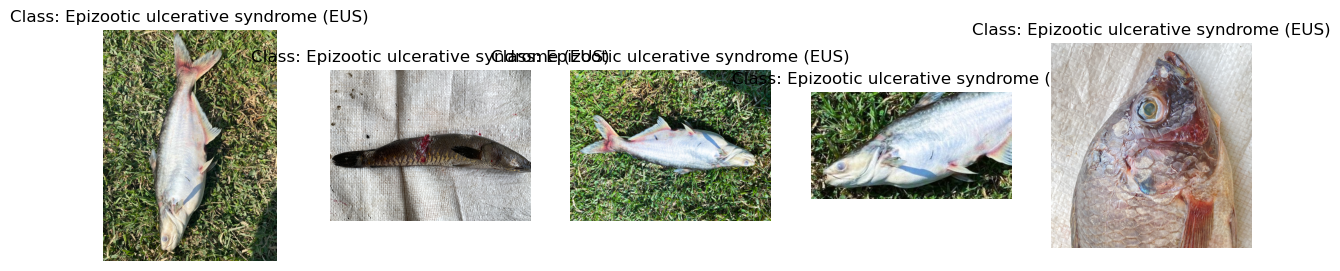

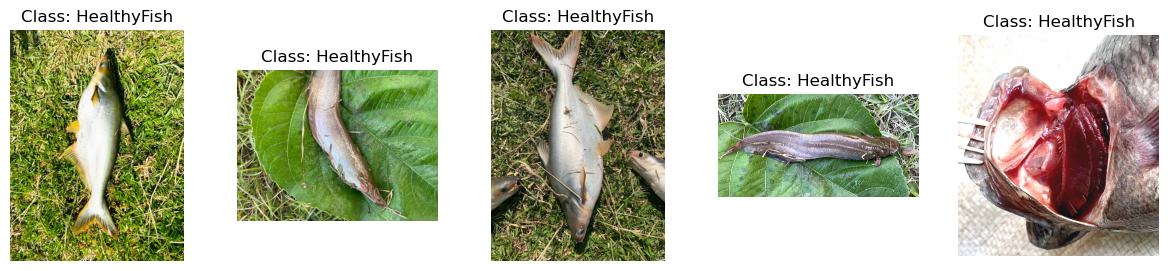

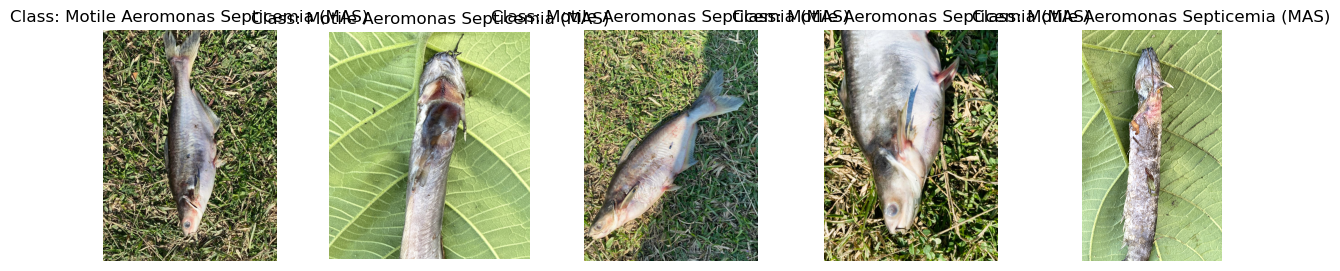

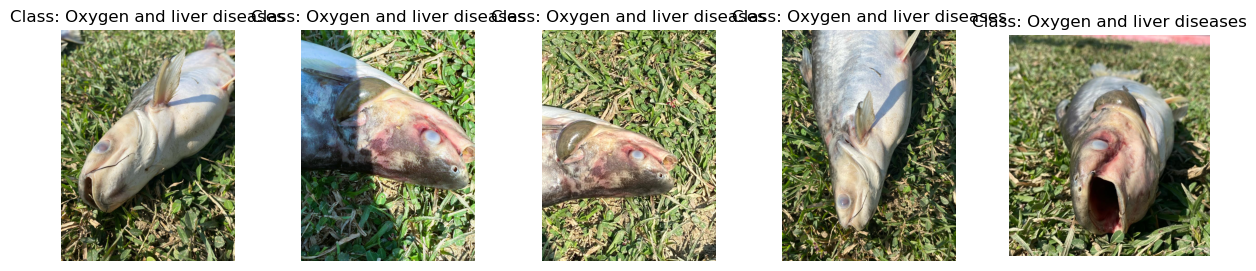

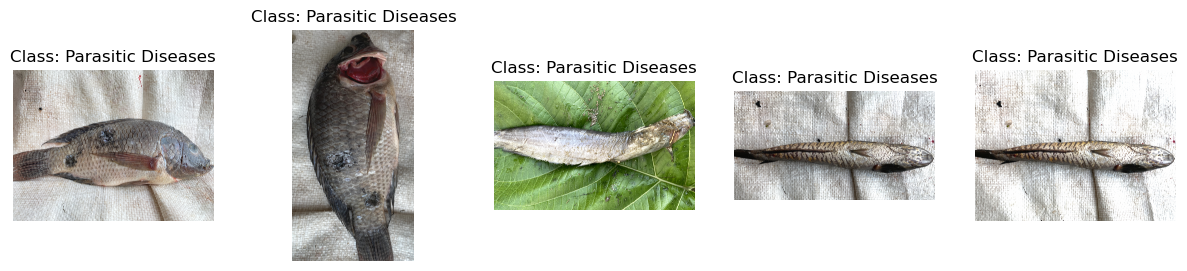

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to the "Fish" directory
IMAGE_PATH = Path('Fish')

# Set the number of images to display per class
images_per_class = 5

# Visualize a random subset of images for each class
for folder_name in sorted(os.listdir(IMAGE_PATH)):
    # Skip hidden folders
    if folder_name.startswith('.'):
        continue
    
    folder_path = IMAGE_PATH / folder_name
    image_paths = list(folder_path.glob("*.JPG"))

    # Check if there are images in the list
    if not image_paths:
        continue

    # Shuffle the image paths to get a random subset
    random.shuffle(image_paths)

    # Take a random subset of images
    selected_images = random.sample(image_paths, min(len(image_paths), images_per_class))

    # Create subplots for each class
    fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 3))

    # Display each image in a subplot
    for i, image_path in enumerate(selected_images):
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].set_title(f'Class: {folder_name}')
        axes[i].axis('off')

    plt.show()


# Resize the imagae

In [6]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Set the path to the "Fish" directory
IMAGE_PATH = Path('Fish')

# Lists to store width and height values
widths = []
heights = []

# Iterate over all images in the dataset
for folder_name in sorted(os.listdir(IMAGE_PATH)):
    folder_path = IMAGE_PATH / folder_name
    image_paths = list(folder_path.glob("*.JPG"))

    # Check if there are images in the list
    if not image_paths:
        continue

    # Shuffle the image paths to get a random subset
    random.shuffle(image_paths)

    # Iterate over all images in the folder
    for selected_image in image_paths:
        # Get width and height of the selected image
        img = mpimg.imread(str(selected_image))  # Convert Path to string
        width, height = img.shape[1], img.shape[0]

        # Store width and height values
        widths.append(width)
        heights.append(height)

        # Display the selected image (optional)
        #plt.imshow(img)
        #plt.title(f'Class: {folder_name}')
        #plt.axis('off')
        #plt.show()

# Create a DataFrame from widths and heights
df_height_width = pd.DataFrame({'width': widths, 'height': heights})

# Display descriptive statistics for height and width
descriptive_stats = df_height_width.describe()
print(descriptive_stats)


             width       height
count  1509.000000  1509.000000
mean   2237.190192  2054.218688
std    1286.758621  1147.062305
min     396.000000   241.000000
25%    1024.000000  1024.000000
50%    2068.000000  2036.000000
75%    3653.000000  3024.000000
max    4032.000000  4032.000000


In [7]:
import pandas as pd
# Create a DataFrame from widths and heights
df_height_width = pd.DataFrame({'width': widths, 'height': heights})

# Display descriptive statistics for height and width
descriptive_stats = df_height_width.describe()
print(descriptive_stats)


             width       height
count  1509.000000  1509.000000
mean   2237.190192  2054.218688
std    1286.758621  1147.062305
min     396.000000   241.000000
25%    1024.000000  1024.000000
50%    2068.000000  2036.000000
75%    3653.000000  3024.000000
max    4032.000000  4032.000000


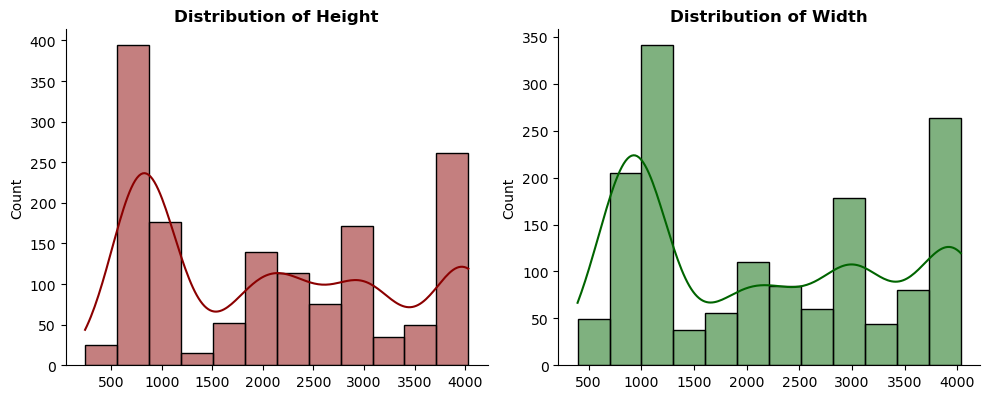

In [8]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set the path to your image directory
IMAGE_PATH = Path('Fish')

# Create a list of all image paths in the directory
TOTAL_IMAGE_PATH_LIST = list(IMAGE_PATH.glob("**/*.JPG"))

# Lists to store height and width values
seq_height = []
seq_width = []

# Iterate over all images in the dataset
for image_path in TOTAL_IMAGE_PATH_LIST:
    img_BGR = cv2.imread(str(image_path))
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    seq_height.append(img_RGB.shape[0])
    seq_width.append(img_RGB.shape[1])

# Plot histograms for height and width
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.1))
ax = ax.flat

sns.histplot(seq_height, kde=True, color='darkred', ax=ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Distribution of Height', fontweight='bold', color='black')

sns.histplot(seq_width, kde=True, color='darkgreen', ax=ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Distribution of Width', fontweight='bold', color='black')

fig.tight_layout()
fig.show()


In [8]:
import pandas as pd
# Create a DataFrame from widths and heights
df_height_width = pd.DataFrame({'height': heights, 'width': widths})

# Display descriptive statistics for height and width
df_height_width.describe().T


count         mean          std    min     25%     50%     75%  \
height  1509.0  2054.218688  1147.062305  241.0  1024.0  2036.0  3024.0   
width   1509.0  2237.190192  1286.758621  396.0  1024.0  2068.0  3653.0   

           max  
height  4032.0  
width   4032.0

# Preprocessing

In [9]:
import pandas as pd
from pathlib import Path

# Set the path to your image directory
IMAGE_PATH = Path('Fish')

# Create a list of all image paths in the directory
TOTAL_IMAGE_PATH_LIST = list(IMAGE_PATH.glob("**/*.JPG"))

# Lists to store image paths and labels
image_paths_list = []
labels_list = []

# Iterate over all images in the dataset
for image_path in TOTAL_IMAGE_PATH_LIST:
    img_path_str = str(image_path)
    label = image_path.parent.name  # Assuming the label is the parent folder name

    # Store image path and label
    image_paths_list.append(img_path_str)
    labels_list.append(label)

# Create a DataFrame to store image paths and labels
df_images_labels = pd.DataFrame({'img_path': image_paths_list, 'label': labels_list})

# Display the DataFrame
df_images_labels.head()


img_path  \
0  Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
1  Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
2  Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
3  Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
4  Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   

                                 label  
0  Epizootic ulcerative syndrome (EUS)  
1  Epizootic ulcerative syndrome (EUS)  
2  Epizootic ulcerative syndrome (EUS)  
3  Epizootic ulcerative syndrome (EUS)  
4  Epizootic ulcerative syndrome (EUS)

In [10]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42

# Separate image paths and labels
image_paths = df_images_labels['img_path'].tolist()
labels = df_images_labels['label'].tolist()

# Split the data into training and test sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=random_seed
)

# Display the number of samples in each set
print("Number of training samples:", len(train_image_paths))
print("Number of test samples:", len(test_image_paths))


Number of training samples: 1207
Number of test samples: 302


In [11]:
from collections import Counter

# Display the total number of images for each class in the training set
train_counter = Counter(train_labels)
print("Total Images of training set:")
print(train_counter)

# Display the total number of images for each class in the test set
test_counter = Counter(test_labels)
print("\nTotal Images of test set:")
print(test_counter)


Total Images of training set:
Counter({'HealthyFish': 418, 'Motile Aeromonas Septicemia (MAS)': 347, 'Parasitic Diseases': 226, 'Epizootic ulcerative syndrome (EUS)': 153, 'Oxygen and liver diseases': 63})

Total Images of test set:
Counter({'HealthyFish': 112, 'Motile Aeromonas Septicemia (MAS)': 88, 'Parasitic Diseases': 56, 'Epizootic ulcerative syndrome (EUS)': 31, 'Oxygen and liver diseases': 15})


In [12]:
# Display unique labels in the original DataFrame
unique_labels = df_images_labels['label'].unique()
print("Unique Labels in the Original DataFrame:")
print(unique_labels)


Unique Labels in the Original DataFrame:
['Epizootic ulcerative syndrome (EUS)' 'HealthyFish'
 'Motile Aeromonas Septicemia (MAS)' 'Oxygen and liver diseases'
 'Parasitic Diseases']


In [13]:
# Display the total number of images for each class in the original DataFrame
original_counter = df_images_labels['label'].value_counts()
print("Total Images in the Original DataFrame:")
print(original_counter)


Total Images in the Original DataFrame:
HealthyFish                            530
Motile Aeromonas Septicemia (MAS)      435
Parasitic Diseases                     282
Epizootic ulcerative syndrome (EUS)    184
Oxygen and liver diseases               78
Name: label, dtype: int64


In [14]:
# Check a few file paths
sample_paths = df_images_labels['img_path'].head().tolist()
print("Sample Paths:")
print(sample_paths)

# Display the first few rows of the DataFrame
print("\nDataFrame Head:")
df_images_labels.head(200)


Sample Paths:
['Fish\\Epizootic ulcerative syndrome (EUS)\\EUS (1).jpg', 'Fish\\Epizootic ulcerative syndrome (EUS)\\EUS (10).jpg', 'Fish\\Epizootic ulcerative syndrome (EUS)\\EUS (100).jpg', 'Fish\\Epizootic ulcerative syndrome (EUS)\\EUS (101).jpg', 'Fish\\Epizootic ulcerative syndrome (EUS)\\EUS (102).jpg']

DataFrame Head:


img_path  \
0    Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
1    Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
2    Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
3    Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
4    Fish\Epizootic ulcerative syndrome (EUS)\EUS (...   
..                                                 ...   
195                 Fish\HealthyFish\Healthy (109).jpg   
196                  Fish\HealthyFish\Healthy (11).JPG   
197                 Fish\HealthyFish\Healthy (110).jpg   
198                 Fish\HealthyFish\Healthy (111).jpg   
199                 Fish\HealthyFish\Healthy (112).jpg   

                                   label  
0    Epizootic ulcerative syndrome (EUS)  
1    Epizootic ulcerative syndrome (EUS)  
2    Epizootic ulcerative syndrome (EUS)  
3    Epizootic ulcerative syndrome (EUS)  
4    Epizootic ulcerative syndrome (EUS)  
..                                   ...  
195                          HealthyFish  
196                          HealthyFish  
197                          HealthyFish  
198                          HealthyFish  
199                          HealthyFish  

[200 rows x 2 columns]

# Define a dictionary for label mapping
label_mapping = {
    'HealthyFish': 0,
    'Motile Aeromonas Septicemia (MAS)': 1,
    'Parasitic Diseases': 2,
    'Epizootic ulcerative syndrome (EUS)': 3,
    'Oxygen and liver diseases': 4
}

# Convert labels to numbers in training set
train_labels_numeric = [label_mapping[label] for label in train_labels]

# Convert labels to numbers in test set
test_labels_numeric = [label_mapping[label] for label in test_labels]

# Display the numeric labels
print("Numeric labels for training set:", train_labels_numeric)
print("Numeric labels for test set:", test_labels_numeric)


In [15]:
import torch
import numpy as np

# Define the mapping of class labels to numerical values
label_mapping = {
    'HealthyFish': 0,
    'Motile Aeromonas Septicemia (MAS)': 1,
    'Parasitic Diseases': 2,
    'Epizootic ulcerative syndrome (EUS)': 3,
    'Oxygen and liver diseases': 4
}

# Convert class labels to numerical values for training set
y_train_array = np.array([label_mapping[label] for label in train_labels])
y_train_torch = torch.from_numpy(y_train_array).long()  # Convert to long

# Convert class labels to numerical values for the test set
y_test_array = np.array([label_mapping[label] for label in test_labels])
y_test_torch = torch.from_numpy(y_test_array).long()  # Convert to long


# Display the numerical labels
print("Numeric labels for the training set:", y_train_torch)
print("Numeric labels for the test set:", y_test_torch)


Numeric labels for the training set: tensor([0, 1, 0,  ..., 1, 2, 1])
Numeric labels for the test set: tensor([0, 1, 0, 0, 1, 4, 3, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 0, 1, 1, 2, 4, 0, 2, 3, 1, 0, 1, 0,
        0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 3, 3, 0, 2, 2, 0, 1, 1, 1, 3, 2, 0,
        1, 2, 1, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 1, 2, 1, 0, 1,
        0, 2, 2, 1, 1, 1, 2, 4, 1, 0, 2, 4, 3, 3, 4, 2, 3, 0, 0, 2, 1, 1, 2, 0,
        1, 1, 3, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 3, 1, 2, 0, 1, 3, 1, 0, 1, 2, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 0,
        3, 3, 0, 2, 0, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 1, 1, 0, 2, 3, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 2, 0, 3, 1, 2, 1, 0, 1, 2, 0, 0, 4, 4, 0, 0, 0, 1, 3, 0,
        0, 1, 2, 0, 0, 4, 1, 0, 4, 1, 0, 1, 0, 0, 3, 3, 2, 1, 1, 0, 1, 0, 1, 1,
        1, 2, 0, 4, 0, 1, 1, 3, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 4, 2, 2, 4, 2,
        0, 0, 1, 

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# Load ResNet50 model with pre-trained weights
model = ResNet50(weights='imagenet')

In [18]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from torchvision.transforms import Compose
from PIL import Image
import torch

# Define the transformations
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms


ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from torchvision.transforms import Compose
from PIL import Image
import torch

# Define the transformations
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()

# Apply the transformations to the training set
images_train = [None] * len(train_image_paths)
for i, img_path_train in enumerate(train_image_paths):
    img_train = Image.open(img_path_train).convert('RGB')
    transformed_image = auto_transforms(img_train)
    if transformed_image is not None:
        images_train.append(transformed_image)

# Apply the transformations to the test set
images_test = [None] * len(test_image_paths)
for i, img_path_test in enumerate(test_image_paths):
    img_test = Image.open(img_path_test).convert('RGB')
    transformed_image = auto_transforms(img_test)
    if transformed_image is not None:
        images_test.append(transformed_image)

# Check if at least one valid image is present in each set
if not images_train or not images_test:
    print("No valid images found in one or both sets.")
else:
    # Convert lists of tensors into a single tensor
    X_train_torch = torch.stack(images_train)
    X_test_torch = torch.stack(images_test)

    # Display the shape of the resulting tensors
    print("Shape of X_train_torch:", X_train_torch.shape)
    print("Shape of X_test_torch:", X_test_torch.shape)


In [19]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from torchvision.transforms import Compose
from PIL import Image
import torch

# Define the transformations
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()

# Apply the transformations to the training set
images_train = [None] * len(train_image_paths)
for i, img_path_train in enumerate(train_image_paths):
    img_train = Image.open(img_path_train).convert('RGB')
    images_train[i] = auto_transforms(img_train)

# Apply the transformations to the test set
images_test = [None] * len(test_image_paths)
for i, img_path_test in enumerate(test_image_paths):
    img_test = Image.open(img_path_test).convert('RGB')
    images_test[i] = auto_transforms(img_test)

# Check if at least one valid image is present in each set
if not images_train or not images_test:
    print("No valid images found in one or both sets.")
else:
    # Convert lists of tensors into a single tensor
    X_train_torch = torch.stack(images_train)
    X_test_torch = torch.stack(images_test)

    # Display the shape of the resulting tensors
    print("Shape of X_train_torch:", X_train_torch.shape)
    print("Shape of X_test_torch:", X_test_torch.shape)


Shape of X_train_torch: torch.Size([1207, 3, 224, 224])
Shape of X_test_torch: torch.Size([302, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

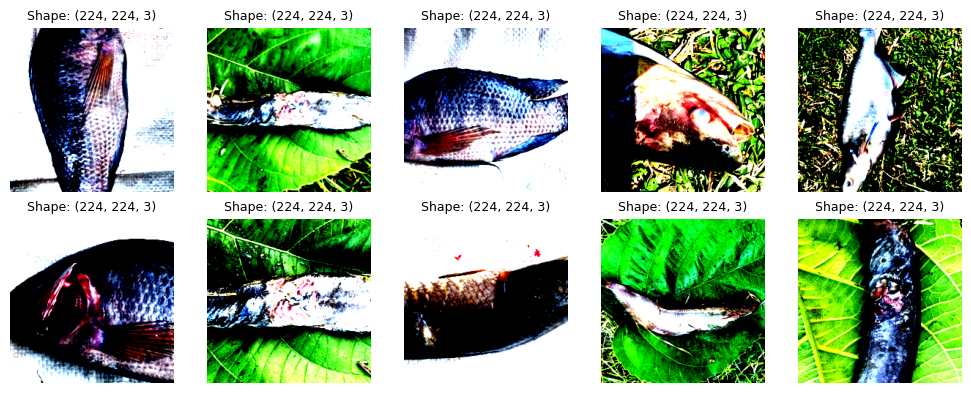

In [20]:
indices = torch.randperm(10).numpy()

fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
ax = ax.flat

for i,j in enumerate(indices):
    IMG = X_train_torch[j].permute(1,2,0).numpy()
    ax[i].imshow(IMG)
    ax[i].set_title(f'Shape: {IMG.shape}', fontsize = 9)
    ax[i].axis('off')
    
fig.tight_layout()
fig.show()

In [21]:
from torch.utils.data import Dataset, DataLoader
# First of all, we convert to Dataset but for this we have to create a Dataset class.
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]
        
        return x,y

In [22]:
# Now we convert to Dataset.
train_dataset = CustomDataset(X_train_torch, y_train_torch)
test_dataset = CustomDataset(X_test_torch, y_test_torch)

In [23]:
BATCH_SIZE = 64
# Set the number of workers based on the operating system
if os.name == 'nt':  # Check if the operating system is Windows
    NUM_WORKERS = 0  # Set to 0 for Windows
else:
    NUM_WORKERS = os.cpu_count()  # Use os.cpu_count() for other operating systems

# Create DataLoader for training set
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

# Create DataLoader for test set
test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [24]:
# Let's visualize a batch.
images_batch, labels_batch = next(iter(train_dataloader))

images_batch.shape, labels_batch.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

# Our Build Model

In [25]:
# GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [26]:
model = resnet50(weights = weights)

In [27]:
from torchinfo import summary
# Now we visualize the architecture of the model.
# The input_size is [4, 3, 224, 224], where:
# 4: Batch size
# 3: Number of channels (for an RGB image)
# 224: Height of the image
# 224: Width of the image
summary(model = model, 
        input_size = [64,3,224,224], 
        col_names = ['input_size','output_size','num_params','trainable'], 
        col_width = 17, 
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [64, 3, 224, 224] [64, 1000]        --                True
├─Conv2d (conv1)                         [64, 3, 224, 224] [64, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [64, 64, 112, 112] [64, 64, 112, 112] 128               True
├─ReLU (relu)                            [64, 64, 112, 112] [64, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [64, 64, 112, 112] [64, 64, 56, 56]  --                --
├─Sequential (layer1)                    [64, 64, 56, 56]  [64, 256, 56, 56] --                True
│    └─Bottleneck (0)                    [64, 64, 56, 56]  [64, 256, 56, 56] --                True
│    │    └─Conv2d (conv1)               [64, 64, 56, 56]  [64, 64, 56, 56]  4,096             True
│    │    └─BatchNorm2d (bn1)            [64, 64, 56, 56]  [64, 64, 56, 56]  128             

In [28]:
# Now we freeze the parameters of the extractor layers.
for param in model.parameters():
    param.requires_grad = False

In [29]:
# We go back to visualize how it looked after freezing the parameters.
# Now we visualize the architecture of the model.
summary(model = model, 
        input_size = [64,3,224,224], 
        col_names = ['input_size','output_size','num_params','trainable'], 
        col_width = 17, 
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [64, 3, 224, 224] [64, 1000]        --                False
├─Conv2d (conv1)                         [64, 3, 224, 224] [64, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [64, 64, 112, 112] [64, 64, 112, 112] (128)             False
├─ReLU (relu)                            [64, 64, 112, 112] [64, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [64, 64, 112, 112] [64, 64, 56, 56]  --                --
├─Sequential (layer1)                    [64, 64, 56, 56]  [64, 256, 56, 56] --                False
│    └─Bottleneck (0)                    [64, 64, 56, 56]  [64, 256, 56, 56] --                False
│    │    └─Conv2d (conv1)               [64, 64, 56, 56]  [64, 64, 56, 56]  (4,096)           False
│    │    └─BatchNorm2d (bn1)            [64, 64, 56, 56]  [64, 64, 56, 56]  (128)     

In [30]:
# Let's visualize the last layer, which we will modify for our binary classification purpose.
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [31]:
from torch import nn, optim
# We modify the last layer.
output_shape = len(classes)

model.fc = nn.Linear(in_features = 2048, out_features = output_shape, bias = True)
loss_fn=nn.CrossEntropyLoss()


In [32]:
model.fc

Linear(in_features=2048, out_features=5, bias=True)

In [33]:
# We visualize our model again.
summary(model = model, 
        input_size = [64,3,224,224], 
        col_names = ['input_size','output_size','num_params','trainable'], 
        col_width = 17, 
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [64, 3, 224, 224] [64, 5]           --                Partial
├─Conv2d (conv1)                         [64, 3, 224, 224] [64, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [64, 64, 112, 112] [64, 64, 112, 112] (128)             False
├─ReLU (relu)                            [64, 64, 112, 112] [64, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [64, 64, 112, 112] [64, 64, 56, 56]  --                --
├─Sequential (layer1)                    [64, 64, 56, 56]  [64, 256, 56, 56] --                False
│    └─Bottleneck (0)                    [64, 64, 56, 56]  [64, 256, 56, 56] --                False
│    │    └─Conv2d (conv1)               [64, 64, 56, 56]  [64, 64, 56, 56]  (4,096)           False
│    │    └─BatchNorm2d (bn1)            [64, 64, 56, 56]  [64, 64, 56, 56]  (128)   

In [34]:
# Now let's visualize one step forward.

pred_logit = model(images_batch.to(device))
pred_logit

tensor([[ 0.0461,  0.0078,  0.1084,  0.1586, -0.0139],
        [-0.2820, -0.3093,  0.1072, -0.0730,  0.0979],
        [-0.1819, -0.1064,  0.1346,  0.0261, -0.1359],
        [-0.0912, -0.1593,  0.0615, -0.0565, -0.0404],
        [-0.1243, -0.2622, -0.1139,  0.1896, -0.0366],
        [-0.4013, -0.2926, -0.0736,  0.0663, -0.2180],
        [-0.0935, -0.2705,  0.3403,  0.1984,  0.0854],
        [ 0.0925, -0.4588,  0.1654, -0.1319, -0.0354],
        [-0.0626, -0.2904,  0.0299,  0.0367, -0.0976],
        [-0.1840, -0.1514, -0.0272, -0.0562,  0.0237],
        [ 0.0043, -0.1197,  0.1694, -0.1632, -0.0799],
        [ 0.0403, -0.2107, -0.1222,  0.0469, -0.1044],
        [-0.1464, -0.1230,  0.0622,  0.0618, -0.1007],
        [-0.1127, -0.0624,  0.1116, -0.0281,  0.0928],
        [-0.0713, -0.1147, -0.0891, -0.0705, -0.0239],
        [-0.0107,  0.0967,  0.0246,  0.0832,  0.1088],
        [-0.0513, -0.3086, -0.0608, -0.0490,  0.0738],
        [ 0.1204, -0.1455,  0.0723,  0.0232,  0.0528],
        [-

In [35]:
# Let's define our loss function and the optimizer.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.01, weight_decay = 0.1)

In [36]:
optimizer

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0.1
)

# Training

In [37]:
def train_step(model:torch.nn.Module, 
               dataloader:torch.utils.data.DataLoader, 
               loss_fn:torch.nn.Module, 
               optimizer:torch.optim.Optimizer):
    
    
    model.train()
    
    train_loss = 0.
    accuracy_train = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)
    
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        y_pred_logit = model(X)
        
        loss = loss_fn(y_pred_logit, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
        accuracy_train.update(y_pred_prob, y)
        
    train_loss = train_loss/len(dataloader)
    train_accuracy = accuracy_train.compute()
    accuracy_train.reset()
    
    return train_loss, train_accuracy

# Checkpoint

In [38]:
def save_checkpoint(filename, model, loss, epoch, optimizer):
    state = {'filename':filename, 
             'model':model.state_dict(), 
             'loss':loss, 
             'epoch':epoch, 
             'optimizer':optimizer.state_dict()}
    
    torch.save(state, filename)

# Testing

In [39]:
def test_step(model:torch.nn.Module, 
              dataloader:torch.utils.data.DataLoader, 
              loss_fn:torch.nn.Module):
    
    
    model.eval()
    
    test_loss = 0.
    accuracy_test = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)
    
    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)
            y_pred_logit = model(X)
            
            loss = loss_fn(y_pred_logit, y)
            test_loss += loss.item()
            
            y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
            accuracy_test.update(y_pred_prob, y)
            
    test_loss = test_loss/len(dataloader)
    test_accuracy = accuracy_test.compute()
    accuracy_test.reset()
    
    return test_loss, test_accuracy

# Train up our build model

In [40]:
def train(model:torch.nn.Module, 
          train_dataloader:torch.utils.data.DataLoader, 
          test_dataloader:torch.utils.data.DataLoader, 
          loss_fn:torch.nn.Module, 
          optimizer:torch.optim.Optimizer, 
          epochs:int):
    
    results = {'train_loss':[], 
               'train_accuracy':[], 
               'test_loss':[], 
               'test_accuracy':[]}
    
    best_test_loss = float('inf')
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy = train_step(model = model, 
                                        dataloader = train_dataloader, 
                                        loss_fn = loss_fn, 
                                        optimizer = optimizer)
        
        
        test_loss, test_accuracy = test_step(model = model, 
                                     dataloader = test_dataloader, 
                                     loss_fn = loss_fn)
        
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            
            file_name = 'best_model.pt'
            
            save_checkpoint(file_name, model, best_test_loss, epoch, optimizer)
            
        print(f'Epoch: {epoch + 1} | ', 
              f'Train Loss: {train_loss:.4f} | ', 
              f'Train Accuracy: {train_accuracy:.4f} | ', 
              f'Test Loss: {test_loss:.4f} | ', 
              f'Test Accuracy: {test_accuracy:.4f}')
        
        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['test_loss'].append(test_loss)
        results['test_accuracy'].append(test_accuracy)
        
    return results

In [41]:
from tqdm import tqdm
from torchmetrics.classification import MulticlassAccuracy

In [42]:
from torch.utils.data import DataLoader

In [43]:
SEED = 42
torch.manual_seed(SEED)

EPOCHS = 100

MODEL_RESULTS = train(model.to(device), 
                      train_dataloader, 
                      test_dataloader, 
                      loss_fn, 
                      optimizer, 
                      EPOCHS)

  1%|          | 1/100 [02:33<4:12:30, 153.04s/it]

Epoch: 1 |  Train Loss: 0.7877 |  Train Accuracy: 0.6429 |  Test Loss: 0.3616 |  Test Accuracy: 0.8479


  2%|▏         | 2/100 [05:06<4:10:25, 153.32s/it]

Epoch: 2 |  Train Loss: 0.1956 |  Train Accuracy: 0.9280 |  Test Loss: 0.1471 |  Test Accuracy: 0.9436


  3%|▎         | 3/100 [07:38<4:07:08, 152.87s/it]

Epoch: 3 |  Train Loss: 0.1040 |  Train Accuracy: 0.9703 |  Test Loss: 0.1061 |  Test Accuracy: 0.9613


  4%|▍         | 4/100 [10:12<4:05:19, 153.33s/it]

Epoch: 4 |  Train Loss: 0.0704 |  Train Accuracy: 0.9852 |  Test Loss: 0.0889 |  Test Accuracy: 0.9782


  5%|▌         | 5/100 [12:50<4:05:17, 154.92s/it]

Epoch: 5 |  Train Loss: 0.0509 |  Train Accuracy: 0.9942 |  Test Loss: 0.0700 |  Test Accuracy: 0.9817


  6%|▌         | 6/100 [15:22<4:01:18, 154.03s/it]

Epoch: 6 |  Train Loss: 0.0434 |  Train Accuracy: 0.9968 |  Test Loss: 0.0658 |  Test Accuracy: 0.9713


  7%|▋         | 7/100 [17:53<3:56:48, 152.78s/it]

Epoch: 7 |  Train Loss: 0.0317 |  Train Accuracy: 0.9968 |  Test Loss: 0.0682 |  Test Accuracy: 0.9630


  8%|▊         | 8/100 [20:29<3:55:57, 153.88s/it]

Epoch: 8 |  Train Loss: 0.0302 |  Train Accuracy: 1.0000 |  Test Loss: 0.0668 |  Test Accuracy: 0.9684


  9%|▉         | 9/100 [23:05<3:54:35, 154.67s/it]

Epoch: 9 |  Train Loss: 0.0278 |  Train Accuracy: 0.9994 |  Test Loss: 0.0579 |  Test Accuracy: 0.9666


 10%|█         | 10/100 [25:35<3:49:31, 153.02s/it]

Epoch: 10 |  Train Loss: 0.0216 |  Train Accuracy: 1.0000 |  Test Loss: 0.0567 |  Test Accuracy: 0.9684


 11%|█         | 11/100 [28:04<3:45:27, 152.00s/it]

Epoch: 11 |  Train Loss: 0.0219 |  Train Accuracy: 0.9991 |  Test Loss: 0.0524 |  Test Accuracy: 0.9702


 12%|█▏        | 12/100 [30:38<3:43:45, 152.57s/it]

Epoch: 12 |  Train Loss: 0.0217 |  Train Accuracy: 1.0000 |  Test Loss: 0.0568 |  Test Accuracy: 0.9800


 13%|█▎        | 13/100 [33:16<3:43:34, 154.19s/it]

Epoch: 13 |  Train Loss: 0.0192 |  Train Accuracy: 1.0000 |  Test Loss: 0.0528 |  Test Accuracy: 0.9666


 14%|█▍        | 14/100 [35:49<3:40:34, 153.89s/it]

Epoch: 14 |  Train Loss: 0.0164 |  Train Accuracy: 1.0000 |  Test Loss: 0.0510 |  Test Accuracy: 0.9666


 15%|█▌        | 15/100 [38:23<3:38:02, 153.91s/it]

Epoch: 15 |  Train Loss: 0.0166 |  Train Accuracy: 0.9994 |  Test Loss: 0.0489 |  Test Accuracy: 0.9666


 16%|█▌        | 16/100 [40:54<3:34:09, 152.97s/it]

Epoch: 16 |  Train Loss: 0.0149 |  Train Accuracy: 0.9968 |  Test Loss: 0.0514 |  Test Accuracy: 0.9800


 17%|█▋        | 17/100 [43:29<3:32:26, 153.57s/it]

Epoch: 17 |  Train Loss: 0.0139 |  Train Accuracy: 1.0000 |  Test Loss: 0.0481 |  Test Accuracy: 0.9666


 18%|█▊        | 18/100 [46:12<3:33:40, 156.35s/it]

Epoch: 18 |  Train Loss: 0.0171 |  Train Accuracy: 0.9991 |  Test Loss: 0.0472 |  Test Accuracy: 0.9684


 19%|█▉        | 19/100 [48:50<3:31:58, 157.01s/it]

Epoch: 19 |  Train Loss: 0.0160 |  Train Accuracy: 0.9991 |  Test Loss: 0.0447 |  Test Accuracy: 0.9666


 20%|██        | 20/100 [51:35<3:32:31, 159.39s/it]

Epoch: 20 |  Train Loss: 0.0116 |  Train Accuracy: 1.0000 |  Test Loss: 0.0445 |  Test Accuracy: 0.9666


 21%|██        | 21/100 [54:23<3:33:15, 161.96s/it]

Epoch: 21 |  Train Loss: 0.0127 |  Train Accuracy: 1.0000 |  Test Loss: 0.0458 |  Test Accuracy: 0.9666


 22%|██▏       | 22/100 [57:09<3:32:07, 163.17s/it]

Epoch: 22 |  Train Loss: 0.0129 |  Train Accuracy: 1.0000 |  Test Loss: 0.0450 |  Test Accuracy: 0.9666


 23%|██▎       | 23/100 [59:54<3:29:56, 163.58s/it]

Epoch: 23 |  Train Loss: 0.0099 |  Train Accuracy: 1.0000 |  Test Loss: 0.0486 |  Test Accuracy: 0.9666


 24%|██▍       | 24/100 [1:02:43<3:29:17, 165.23s/it]

Epoch: 24 |  Train Loss: 0.0102 |  Train Accuracy: 1.0000 |  Test Loss: 0.0417 |  Test Accuracy: 0.9666


 25%|██▌       | 25/100 [1:05:33<3:28:29, 166.79s/it]

Epoch: 25 |  Train Loss: 0.0111 |  Train Accuracy: 1.0000 |  Test Loss: 0.0444 |  Test Accuracy: 0.9666


 26%|██▌       | 26/100 [1:08:17<3:24:37, 165.91s/it]

Epoch: 26 |  Train Loss: 0.0089 |  Train Accuracy: 1.0000 |  Test Loss: 0.0443 |  Test Accuracy: 0.9800


 27%|██▋       | 27/100 [1:10:57<3:19:43, 164.16s/it]

Epoch: 27 |  Train Loss: 0.0098 |  Train Accuracy: 1.0000 |  Test Loss: 0.0448 |  Test Accuracy: 0.9666


 28%|██▊       | 28/100 [1:13:32<3:13:41, 161.41s/it]

Epoch: 28 |  Train Loss: 0.0082 |  Train Accuracy: 1.0000 |  Test Loss: 0.0470 |  Test Accuracy: 0.9666


 29%|██▉       | 29/100 [1:16:07<3:08:47, 159.54s/it]

Epoch: 29 |  Train Loss: 0.0068 |  Train Accuracy: 1.0000 |  Test Loss: 0.0424 |  Test Accuracy: 0.9666


 30%|███       | 30/100 [1:18:41<3:03:55, 157.65s/it]

Epoch: 30 |  Train Loss: 0.0087 |  Train Accuracy: 1.0000 |  Test Loss: 0.0425 |  Test Accuracy: 0.9684


 31%|███       | 31/100 [1:21:16<3:00:38, 157.08s/it]

Epoch: 31 |  Train Loss: 0.0100 |  Train Accuracy: 1.0000 |  Test Loss: 0.0502 |  Test Accuracy: 0.9684


 32%|███▏      | 32/100 [1:23:49<2:56:20, 155.59s/it]

Epoch: 32 |  Train Loss: 0.0094 |  Train Accuracy: 1.0000 |  Test Loss: 0.0421 |  Test Accuracy: 0.9666


 33%|███▎      | 33/100 [1:26:22<2:53:08, 155.05s/it]

Epoch: 33 |  Train Loss: 0.0103 |  Train Accuracy: 1.0000 |  Test Loss: 0.0437 |  Test Accuracy: 0.9666


 34%|███▍      | 34/100 [1:28:54<2:49:21, 153.97s/it]

Epoch: 34 |  Train Loss: 0.0080 |  Train Accuracy: 1.0000 |  Test Loss: 0.0413 |  Test Accuracy: 0.9684


 35%|███▌      | 35/100 [1:31:26<2:46:08, 153.35s/it]

Epoch: 35 |  Train Loss: 0.0077 |  Train Accuracy: 1.0000 |  Test Loss: 0.0433 |  Test Accuracy: 0.9666


 36%|███▌      | 36/100 [1:33:56<2:42:37, 152.46s/it]

Epoch: 36 |  Train Loss: 0.0068 |  Train Accuracy: 1.0000 |  Test Loss: 0.0408 |  Test Accuracy: 0.9684


 37%|███▋      | 37/100 [1:36:25<2:38:57, 151.38s/it]

Epoch: 37 |  Train Loss: 0.0085 |  Train Accuracy: 1.0000 |  Test Loss: 0.0370 |  Test Accuracy: 0.9666


 38%|███▊      | 38/100 [1:38:53<2:35:24, 150.39s/it]

Epoch: 38 |  Train Loss: 0.0064 |  Train Accuracy: 1.0000 |  Test Loss: 0.0422 |  Test Accuracy: 0.9666


 39%|███▉      | 39/100 [1:41:24<2:33:01, 150.52s/it]

Epoch: 39 |  Train Loss: 0.0074 |  Train Accuracy: 1.0000 |  Test Loss: 0.0472 |  Test Accuracy: 0.9684


 40%|████      | 40/100 [1:44:07<2:34:24, 154.40s/it]

Epoch: 40 |  Train Loss: 0.0087 |  Train Accuracy: 1.0000 |  Test Loss: 0.0483 |  Test Accuracy: 0.9817


 41%|████      | 41/100 [1:46:36<2:30:17, 152.84s/it]

Epoch: 41 |  Train Loss: 0.0081 |  Train Accuracy: 1.0000 |  Test Loss: 0.0459 |  Test Accuracy: 0.9684


 42%|████▏     | 42/100 [1:49:09<2:27:34, 152.67s/it]

Epoch: 42 |  Train Loss: 0.0075 |  Train Accuracy: 1.0000 |  Test Loss: 0.0380 |  Test Accuracy: 0.9684


 43%|████▎     | 43/100 [1:51:36<2:23:30, 151.06s/it]

Epoch: 43 |  Train Loss: 0.0069 |  Train Accuracy: 1.0000 |  Test Loss: 0.0418 |  Test Accuracy: 0.9684


 44%|████▍     | 44/100 [1:54:06<2:20:42, 150.75s/it]

Epoch: 44 |  Train Loss: 0.0078 |  Train Accuracy: 1.0000 |  Test Loss: 0.0368 |  Test Accuracy: 0.9666


 45%|████▌     | 45/100 [1:56:34<2:17:20, 149.83s/it]

Epoch: 45 |  Train Loss: 0.0071 |  Train Accuracy: 1.0000 |  Test Loss: 0.0423 |  Test Accuracy: 0.9684


 46%|████▌     | 46/100 [1:59:03<2:14:38, 149.60s/it]

Epoch: 46 |  Train Loss: 0.0067 |  Train Accuracy: 1.0000 |  Test Loss: 0.0417 |  Test Accuracy: 0.9684


 47%|████▋     | 47/100 [2:01:31<2:11:52, 149.29s/it]

Epoch: 47 |  Train Loss: 0.0073 |  Train Accuracy: 1.0000 |  Test Loss: 0.0405 |  Test Accuracy: 0.9684


 48%|████▊     | 48/100 [2:04:00<2:09:06, 148.96s/it]

Epoch: 48 |  Train Loss: 0.0090 |  Train Accuracy: 1.0000 |  Test Loss: 0.0399 |  Test Accuracy: 0.9684


 49%|████▉     | 49/100 [2:06:28<2:06:35, 148.94s/it]

Epoch: 49 |  Train Loss: 0.0063 |  Train Accuracy: 1.0000 |  Test Loss: 0.0389 |  Test Accuracy: 0.9702


 50%|█████     | 50/100 [2:08:56<2:03:38, 148.37s/it]

Epoch: 50 |  Train Loss: 0.0050 |  Train Accuracy: 1.0000 |  Test Loss: 0.0391 |  Test Accuracy: 0.9684


 51%|█████     | 51/100 [2:11:25<2:01:32, 148.84s/it]

Epoch: 51 |  Train Loss: 0.0057 |  Train Accuracy: 1.0000 |  Test Loss: 0.0392 |  Test Accuracy: 0.9684


 52%|█████▏    | 52/100 [2:13:55<1:59:09, 148.95s/it]

Epoch: 52 |  Train Loss: 0.0062 |  Train Accuracy: 1.0000 |  Test Loss: 0.0430 |  Test Accuracy: 0.9684


 53%|█████▎    | 53/100 [2:16:18<1:55:21, 147.27s/it]

Epoch: 53 |  Train Loss: 0.0060 |  Train Accuracy: 1.0000 |  Test Loss: 0.0439 |  Test Accuracy: 0.9684


 54%|█████▍    | 54/100 [2:18:40<1:51:46, 145.79s/it]

Epoch: 54 |  Train Loss: 0.0054 |  Train Accuracy: 1.0000 |  Test Loss: 0.0423 |  Test Accuracy: 0.9800


 55%|█████▌    | 55/100 [2:21:12<1:50:41, 147.59s/it]

Epoch: 55 |  Train Loss: 0.0049 |  Train Accuracy: 1.0000 |  Test Loss: 0.0372 |  Test Accuracy: 0.9684


 56%|█████▌    | 56/100 [2:23:39<1:48:08, 147.46s/it]

Epoch: 56 |  Train Loss: 0.0056 |  Train Accuracy: 1.0000 |  Test Loss: 0.0390 |  Test Accuracy: 0.9684


 57%|█████▋    | 57/100 [2:26:08<1:45:51, 147.71s/it]

Epoch: 57 |  Train Loss: 0.0052 |  Train Accuracy: 1.0000 |  Test Loss: 0.0398 |  Test Accuracy: 0.9684


 58%|█████▊    | 58/100 [2:28:37<1:43:41, 148.14s/it]

Epoch: 58 |  Train Loss: 0.0047 |  Train Accuracy: 1.0000 |  Test Loss: 0.0387 |  Test Accuracy: 0.9684


 59%|█████▉    | 59/100 [2:31:03<1:40:54, 147.68s/it]

Epoch: 59 |  Train Loss: 0.0060 |  Train Accuracy: 1.0000 |  Test Loss: 0.0413 |  Test Accuracy: 0.9684


 60%|██████    | 60/100 [2:33:30<1:38:14, 147.36s/it]

Epoch: 60 |  Train Loss: 0.0052 |  Train Accuracy: 1.0000 |  Test Loss: 0.0346 |  Test Accuracy: 0.9684


 61%|██████    | 61/100 [2:35:56<1:35:28, 146.89s/it]

Epoch: 61 |  Train Loss: 0.0046 |  Train Accuracy: 1.0000 |  Test Loss: 0.0381 |  Test Accuracy: 0.9684


 62%|██████▏   | 62/100 [2:38:22<1:32:51, 146.61s/it]

Epoch: 62 |  Train Loss: 0.0059 |  Train Accuracy: 1.0000 |  Test Loss: 0.0343 |  Test Accuracy: 0.9702


 63%|██████▎   | 63/100 [2:40:48<1:30:20, 146.49s/it]

Epoch: 63 |  Train Loss: 0.0055 |  Train Accuracy: 1.0000 |  Test Loss: 0.0442 |  Test Accuracy: 0.9684


 64%|██████▍   | 64/100 [2:43:13<1:27:38, 146.08s/it]

Epoch: 64 |  Train Loss: 0.0048 |  Train Accuracy: 1.0000 |  Test Loss: 0.0371 |  Test Accuracy: 0.9666


 65%|██████▌   | 65/100 [2:45:39<1:25:07, 145.94s/it]

Epoch: 65 |  Train Loss: 0.0055 |  Train Accuracy: 1.0000 |  Test Loss: 0.0413 |  Test Accuracy: 0.9800


 66%|██████▌   | 66/100 [2:48:04<1:22:40, 145.89s/it]

Epoch: 66 |  Train Loss: 0.0054 |  Train Accuracy: 1.0000 |  Test Loss: 0.0373 |  Test Accuracy: 0.9666


 67%|██████▋   | 67/100 [2:50:30<1:20:09, 145.73s/it]

Epoch: 67 |  Train Loss: 0.0045 |  Train Accuracy: 1.0000 |  Test Loss: 0.0349 |  Test Accuracy: 0.9684


 68%|██████▊   | 68/100 [2:52:55<1:17:36, 145.51s/it]

Epoch: 68 |  Train Loss: 0.0051 |  Train Accuracy: 1.0000 |  Test Loss: 0.0441 |  Test Accuracy: 0.9684


 69%|██████▉   | 69/100 [2:55:20<1:15:09, 145.48s/it]

Epoch: 69 |  Train Loss: 0.0049 |  Train Accuracy: 1.0000 |  Test Loss: 0.0402 |  Test Accuracy: 0.9684


 70%|███████   | 70/100 [2:57:46<1:12:45, 145.52s/it]

Epoch: 70 |  Train Loss: 0.0045 |  Train Accuracy: 1.0000 |  Test Loss: 0.0387 |  Test Accuracy: 0.9666


 71%|███████   | 71/100 [3:00:11<1:10:20, 145.52s/it]

Epoch: 71 |  Train Loss: 0.0045 |  Train Accuracy: 1.0000 |  Test Loss: 0.0411 |  Test Accuracy: 0.9684


 72%|███████▏  | 72/100 [3:02:36<1:07:50, 145.36s/it]

Epoch: 72 |  Train Loss: 0.0053 |  Train Accuracy: 1.0000 |  Test Loss: 0.0333 |  Test Accuracy: 0.9702


 73%|███████▎  | 73/100 [3:05:02<1:05:24, 145.36s/it]

Epoch: 73 |  Train Loss: 0.0047 |  Train Accuracy: 1.0000 |  Test Loss: 0.0342 |  Test Accuracy: 0.9684


 74%|███████▍  | 74/100 [3:07:27<1:03:01, 145.43s/it]

Epoch: 74 |  Train Loss: 0.0044 |  Train Accuracy: 1.0000 |  Test Loss: 0.0321 |  Test Accuracy: 0.9684


 75%|███████▌  | 75/100 [3:09:53<1:00:39, 145.57s/it]

Epoch: 75 |  Train Loss: 0.0039 |  Train Accuracy: 1.0000 |  Test Loss: 0.0322 |  Test Accuracy: 0.9702


 76%|███████▌  | 76/100 [3:12:20<58:21, 145.90s/it]  

Epoch: 76 |  Train Loss: 0.0043 |  Train Accuracy: 1.0000 |  Test Loss: 0.0352 |  Test Accuracy: 0.9684


 77%|███████▋  | 77/100 [3:14:45<55:51, 145.74s/it]

Epoch: 77 |  Train Loss: 0.0041 |  Train Accuracy: 1.0000 |  Test Loss: 0.0366 |  Test Accuracy: 0.9684


 78%|███████▊  | 78/100 [3:17:13<53:39, 146.33s/it]

Epoch: 78 |  Train Loss: 0.0055 |  Train Accuracy: 1.0000 |  Test Loss: 0.0408 |  Test Accuracy: 0.9702


 79%|███████▉  | 79/100 [3:19:40<51:17, 146.57s/it]

Epoch: 79 |  Train Loss: 0.0051 |  Train Accuracy: 0.9995 |  Test Loss: 0.0408 |  Test Accuracy: 0.9684


 80%|████████  | 80/100 [3:22:07<48:54, 146.73s/it]

Epoch: 80 |  Train Loss: 0.0056 |  Train Accuracy: 1.0000 |  Test Loss: 0.0433 |  Test Accuracy: 0.9702


 81%|████████  | 81/100 [3:24:33<46:23, 146.50s/it]

Epoch: 81 |  Train Loss: 0.0062 |  Train Accuracy: 1.0000 |  Test Loss: 0.0368 |  Test Accuracy: 0.9702


 82%|████████▏ | 82/100 [3:26:59<43:51, 146.19s/it]

Epoch: 82 |  Train Loss: 0.0048 |  Train Accuracy: 1.0000 |  Test Loss: 0.0417 |  Test Accuracy: 0.9666


 83%|████████▎ | 83/100 [3:29:24<41:21, 145.97s/it]

Epoch: 83 |  Train Loss: 0.0057 |  Train Accuracy: 1.0000 |  Test Loss: 0.0365 |  Test Accuracy: 0.9666


 84%|████████▍ | 84/100 [3:31:49<38:50, 145.68s/it]

Epoch: 84 |  Train Loss: 0.0039 |  Train Accuracy: 1.0000 |  Test Loss: 0.0338 |  Test Accuracy: 0.9666


 85%|████████▌ | 85/100 [3:34:15<36:24, 145.65s/it]

Epoch: 85 |  Train Loss: 0.0038 |  Train Accuracy: 1.0000 |  Test Loss: 0.0395 |  Test Accuracy: 0.9666


 86%|████████▌ | 86/100 [3:36:40<33:56, 145.49s/it]

Epoch: 86 |  Train Loss: 0.0034 |  Train Accuracy: 1.0000 |  Test Loss: 0.0363 |  Test Accuracy: 0.9666


 87%|████████▋ | 87/100 [3:39:06<31:33, 145.68s/it]

Epoch: 87 |  Train Loss: 0.0040 |  Train Accuracy: 1.0000 |  Test Loss: 0.0372 |  Test Accuracy: 0.9684


 88%|████████▊ | 88/100 [3:41:31<29:07, 145.62s/it]

Epoch: 88 |  Train Loss: 0.0039 |  Train Accuracy: 1.0000 |  Test Loss: 0.0363 |  Test Accuracy: 0.9666


 89%|████████▉ | 89/100 [3:43:56<26:37, 145.26s/it]

Epoch: 89 |  Train Loss: 0.0036 |  Train Accuracy: 1.0000 |  Test Loss: 0.0391 |  Test Accuracy: 0.9666


 90%|█████████ | 90/100 [3:46:21<24:13, 145.34s/it]

Epoch: 90 |  Train Loss: 0.0032 |  Train Accuracy: 1.0000 |  Test Loss: 0.0370 |  Test Accuracy: 0.9666


 91%|█████████ | 91/100 [3:48:47<21:49, 145.45s/it]

Epoch: 91 |  Train Loss: 0.0040 |  Train Accuracy: 1.0000 |  Test Loss: 0.0378 |  Test Accuracy: 0.9666


 92%|█████████▏| 92/100 [3:51:12<19:21, 145.22s/it]

Epoch: 92 |  Train Loss: 0.0043 |  Train Accuracy: 1.0000 |  Test Loss: 0.0369 |  Test Accuracy: 0.9702


 93%|█████████▎| 93/100 [3:53:37<16:55, 145.11s/it]

Epoch: 93 |  Train Loss: 0.0043 |  Train Accuracy: 1.0000 |  Test Loss: 0.0383 |  Test Accuracy: 0.9684


 94%|█████████▍| 94/100 [3:56:02<14:31, 145.17s/it]

Epoch: 94 |  Train Loss: 0.0035 |  Train Accuracy: 1.0000 |  Test Loss: 0.0390 |  Test Accuracy: 0.9666


 95%|█████████▌| 95/100 [3:58:28<12:07, 145.41s/it]

Epoch: 95 |  Train Loss: 0.0038 |  Train Accuracy: 1.0000 |  Test Loss: 0.0350 |  Test Accuracy: 0.9684


 96%|█████████▌| 96/100 [4:00:53<09:41, 145.30s/it]

Epoch: 96 |  Train Loss: 0.0030 |  Train Accuracy: 1.0000 |  Test Loss: 0.0379 |  Test Accuracy: 0.9666


 97%|█████████▋| 97/100 [4:03:18<07:15, 145.30s/it]

Epoch: 97 |  Train Loss: 0.0032 |  Train Accuracy: 1.0000 |  Test Loss: 0.0361 |  Test Accuracy: 0.9666


 98%|█████████▊| 98/100 [4:05:44<04:50, 145.48s/it]

Epoch: 98 |  Train Loss: 0.0035 |  Train Accuracy: 1.0000 |  Test Loss: 0.0351 |  Test Accuracy: 0.9766


 99%|█████████▉| 99/100 [4:08:09<02:25, 145.43s/it]

Epoch: 99 |  Train Loss: 0.0031 |  Train Accuracy: 1.0000 |  Test Loss: 0.0443 |  Test Accuracy: 0.9684


100%|██████████| 100/100 [4:10:35<00:00, 150.35s/it]

Epoch: 100 |  Train Loss: 0.0045 |  Train Accuracy: 1.0000 |  Test Loss: 0.0367 |  Test Accuracy: 0.9666


# Metric of Performance

In [46]:
# Function to plot the loss and metric during each training epoch.
def plot_loss_metric_curve(model_results:Dict[str,List[float]]):
    
    train_loss = model_results["train_loss"]
    test_loss = model_results["test_loss"]
    
    train_accuracy = [float(value) for value in model_results["train_accuracy"]]
    test_accuracy = [float(value) for value in model_results["test_accuracy"]]
    
    fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    plt.style.use("ggplot")
    axes = axes.flat
    
    axes[0].plot(train_loss, color = "red", label = "Train")
    axes[0].plot(test_loss, color = "blue", label = "Test")
    axes[0].set_title("CrossEntropyLoss", fontsize = 12, fontweight = "bold", color = "black")
    axes[0].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].set_ylabel("Loss", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].legend()
    
    axes[1].plot(train_accuracy, color = "red", label = "Train")
    axes[1].plot(test_accuracy, color = "blue", label = "Test")
    axes[1].set_title("Metric of performance: Accuracy", fontsize = 12, fontweight = "bold", color = "black")
    axes[1].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].set_ylabel("Score", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].legend()
    
    fig.tight_layout()
    fig.show()

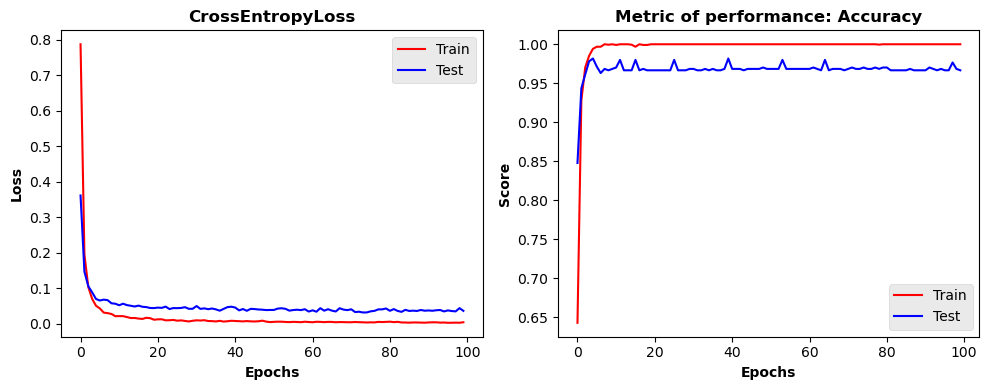

In [47]:
plot_loss_metric_curve(MODEL_RESULTS)

In [51]:
import torchvision
from torchvision.models import resnet50
num_classes = len(classes)
model = torchvision.models.resnet50(pretrained=False, num_classes=num_classes)

In [53]:
# Load the best model checkpoint
path_checkpoint = "best_model.pt"  # Set the correct path to your saved checkpoint
checkpoint = torch.load(path_checkpoint)

# Load the model state_dict from the checkpoint
model.load_state_dict(checkpoint["model"])


<All keys matched successfully>

In [54]:
model.to(device)
model.load_state_dict(checkpoint["model"])

model.eval()
with torch.inference_mode():
    y_pred_logits_train = model(X_train_torch.to(device))
    y_pred_logits_test = model(X_test_torch.to(device))

y_pred_prob_train = torch.softmax(y_pred_logits_train, dim=1).cpu()
y_pred_class_train = torch.argmax(y_pred_prob_train, dim=1).numpy().astype(int)

y_pred_prob_test = torch.softmax(y_pred_logits_test, dim=1).cpu()
y_pred_class_test = torch.argmax(y_pred_prob_test, dim=1).numpy().astype(int)


# Build confusion matrix 

In [55]:
# Build confusion matrix for train set
cf_mx_train = confusion_matrix(y_train_array.astype(int), y_pred_class_train)

# Build confusion matrix for test set
cf_mx_test = confusion_matrix(y_test_array.astype(int), y_pred_class_test)



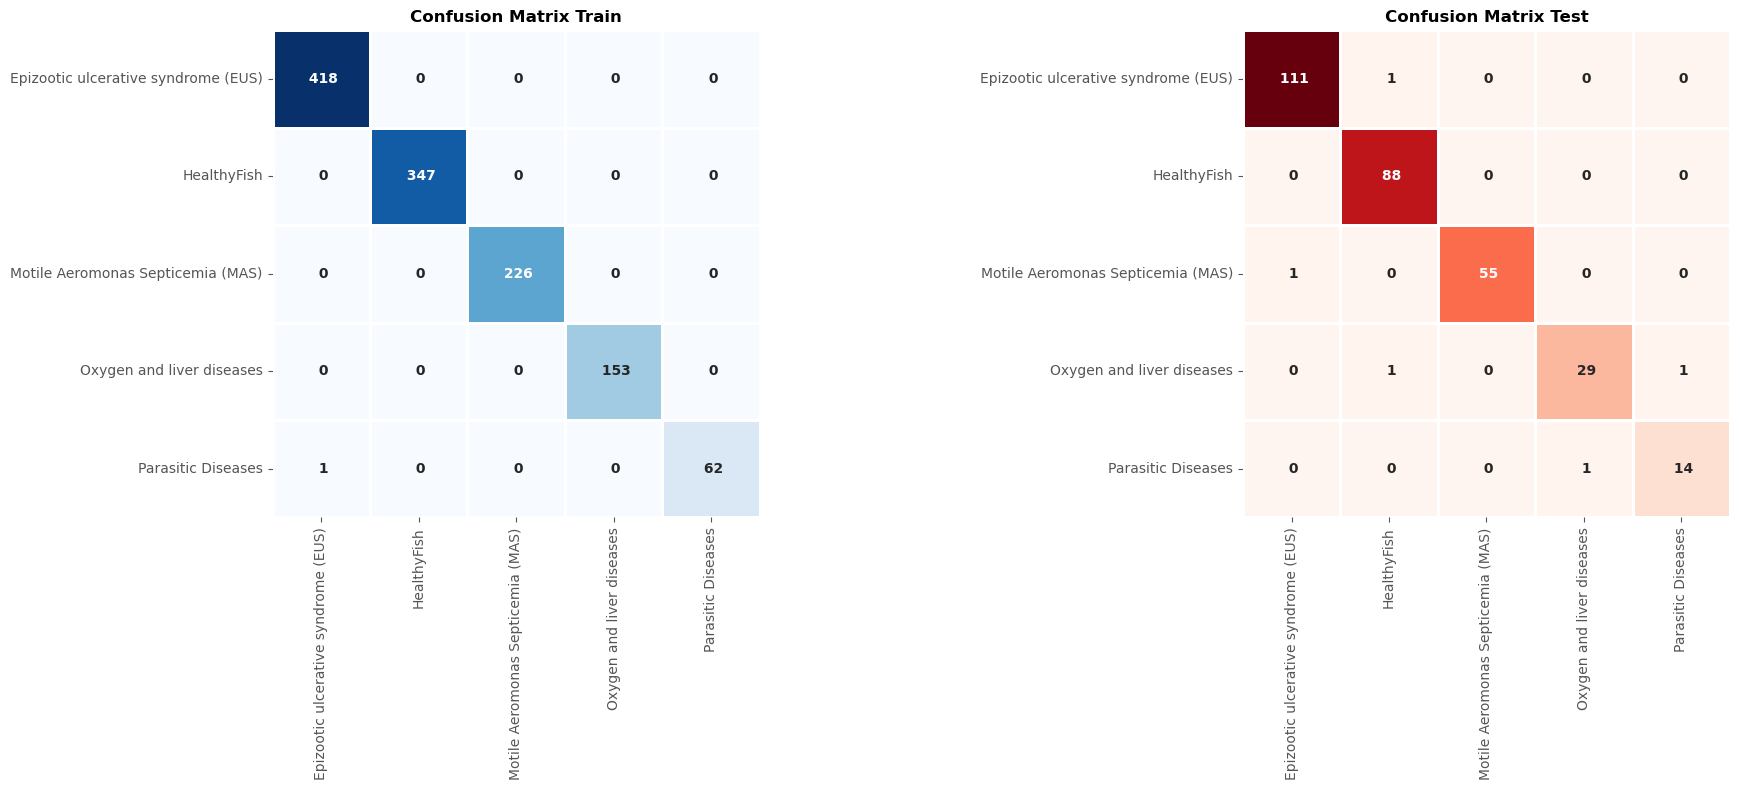

In [56]:
# Plot confusion matrices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax = ax.flat

# Train set confusion matrix
sns.heatmap(cf_mx_train, 
            cmap='Blues', 
            annot=True, 
            fmt=' ', 
            annot_kws={"fontsize": 10, "fontweight": "bold"}, 
            linewidths=1, 
            linecolor="white", 
            cbar=False, 
            square=True, 
            xticklabels=classes,
            yticklabels=classes,
            ax=ax[0])
ax[0].set_title('Confusion Matrix Train', fontsize=12, fontweight='bold', color='black')

# Test set confusion matrix
sns.heatmap(cf_mx_test, 
            cmap='Reds', 
            annot=True, 
            fmt=' ', 
            annot_kws={"fontsize": 10, "fontweight": "bold"}, 
            linewidths=1, 
            linecolor="white", 
            cbar=False, 
            square=True, 
            xticklabels=classes, 
            yticklabels=classes,
            ax=ax[1])
ax[1].set_title('Confusion Matrix Test', fontsize=12, fontweight='bold', color='black')

fig.tight_layout()
fig.show()


# Measurement of Accuracy

In [57]:
from sklearn.metrics import accuracy_score

# Assuming y_train_array and y_pred_class_train are defined
accuracy_train = accuracy_score(y_train_array.astype(int), y_pred_class_train)
print(f'Accuracy train = {accuracy_train}')

# Assuming y_test_array and y_pred_class_test are defined
accuracy_test = accuracy_score(y_test_array.astype(int), y_pred_class_test)
print(f'Accuracy test = {accuracy_test}')


Accuracy train = 0.9991714995857498
Accuracy test = 0.9834437086092715


# Classification


classes = ['Epizootic ulcerative syndrome (EUS)', 'HealthyFish', 'Motile Aeromonas Septicemia (MAS)', 'Oxygen and liver diseases', 'Parasitic Diseases']

# Create a reverse mapping from ID to label
id2label = dict(zip(range(len(classes)), classes))

# Print the id2label dictionary
print(id2label)


In [59]:
# Your class labels and numerical values mapping
label_mapping = {
    'HealthyFish': 0,
    'Motile Aeromonas Septicemia (MAS)': 1,
    'Parasitic Diseases': 2,
    'Epizootic ulcerative syndrome (EUS)': 3,
    'Oxygen and liver diseases': 4
}

# Create a reverse mapping from ID to label
id2label = {v: k for k, v in label_mapping.items()}

# Print the id2label dictionary
print(id2label)


{0: 'HealthyFish', 1: 'Motile Aeromonas Septicemia (MAS)', 2: 'Parasitic Diseases', 3: 'Epizootic ulcerative syndrome (EUS)', 4: 'Oxygen and liver diseases'}


In [60]:
# Print classification report for the training set
print("==" * 40)
print(" " * 25, "Classification Report Train")
print("==" * 40)
print(classification_report(pd.Series(y_train_array).map(id2label), 
                            pd.Series(y_pred_class_train).map(id2label)))

# Print classification report for the test set
print("==" * 40)
print(" " * 25, "Classification Report Test")
print("==" * 40)
print(classification_report(pd.Series(y_test_array).map(id2label), 
                            pd.Series(y_pred_class_test).map(id2label)))

                          Classification Report Train
                                     precision    recall  f1-score   support

Epizootic ulcerative syndrome (EUS)       1.00      1.00      1.00       153
                        HealthyFish       1.00      1.00      1.00       418
  Motile Aeromonas Septicemia (MAS)       1.00      1.00      1.00       347
          Oxygen and liver diseases       1.00      0.98      0.99        63
                 Parasitic Diseases       1.00      1.00      1.00       226

                           accuracy                           1.00      1207
                          macro avg       1.00      1.00      1.00      1207
                       weighted avg       1.00      1.00      1.00      1207

                          Classification Report Test
                                     precision    recall  f1-score   support

Epizootic ulcerative syndrome (EUS)       0.97      0.94      0.95        31
                        HealthyFish       

In [17]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

Accuracy on training set: 1.00
Accuracy on test set: 0.73

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       274
           2       1.00      1.00      1.00       187
           3       1.00      1.00      1.00       122
           4       1.00      1.00      1.00        47

    accuracy                           1.00       965
   macro avg       1.00      1.00      1.00       965
weighted avg       1.00      1.00      1.00       965


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        83
           1       0.85      0.82      0.83        73
           2       0.62      0.67      0.64        39
           3       0.77      0.74      0.75        31
           4       0.90      0.56      0.69        16

    accuracy                           0.73      

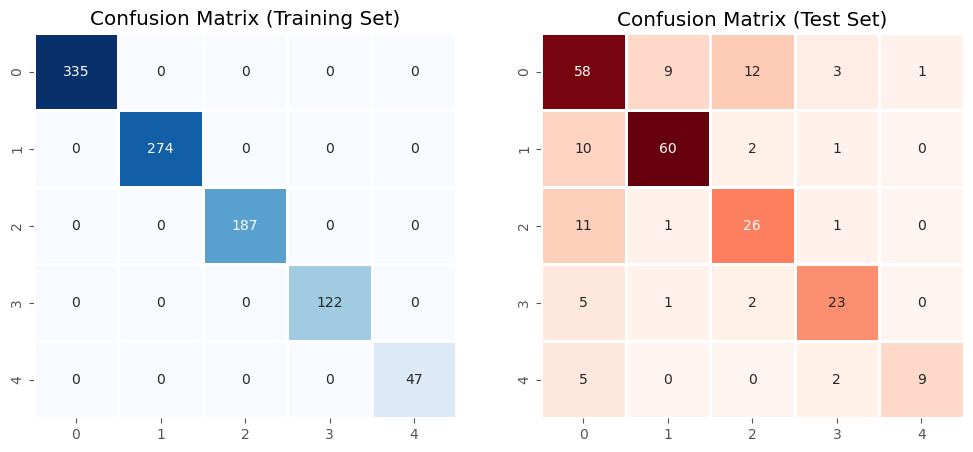

In [63]:

# X_train_torch, X_test_torch, y_train_array, y_test_array, id2label

# Convert PyTorch tensors to numpy arrays
X_train_np = X_train_torch.numpy()
X_test_np = X_test_torch.numpy()
y_train_np = y_train_array.astype(int)
y_test_np = y_test_array.astype(int)

# Reshape to 2D arrays
X_train_flatten = X_train_np.reshape(X_train_np.shape[0], -1)
X_test_flatten = X_test_np.reshape(X_test_np.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_flatten, y_train_np, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy on training set: {accuracy_train:.2f}')
print(f'Accuracy on test set: {accuracy_test:.2f}')

# Classification Report
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_mx_train = confusion_matrix(y_train, y_pred_train)
conf_mx_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax = ax.flat

# Training Set Confusion Matrix
sns.heatmap(conf_mx_train, annot=True, fmt='d', cmap='Blues', linewidths=1, cbar=False, ax=ax[0])
ax[0].set_title('Confusion Matrix (Training Set)')

# Test Set Confusion Matrix
sns.heatmap(conf_mx_test, annot=True, fmt='d', cmap='Reds', linewidths=1, cbar=False, ax=ax[1])
ax[1].set_title('Confusion Matrix (Test Set)')

plt.show()


Accuracy on training set: 1.00
Accuracy on test set: 0.73

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       274
           2       1.00      1.00      1.00       187
           3       1.00      1.00      1.00       122
           4       1.00      1.00      1.00        47

    accuracy                           1.00       965
   macro avg       1.00      1.00      1.00       965
weighted avg       1.00      1.00      1.00       965


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        83
           1       0.85      0.82      0.83        73
           2       0.62      0.67      0.64        39
           3       0.77      0.74      0.75        31
           4       0.90      0.56      0.69        16

    accuracy                           0.73      

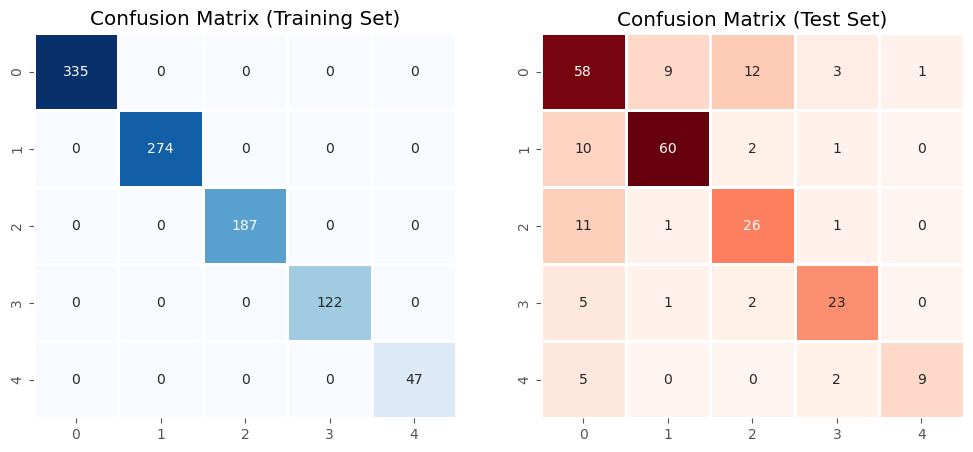

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_flatten, y_train_np, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy on training set: {accuracy_train:.2f}')
print(f'Accuracy on test set: {accuracy_test:.2f}')

# Classification Report
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_mx_train = confusion_matrix(y_train, y_pred_train)
conf_mx_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax = ax.flat

# Training Set Confusion Matrix
sns.heatmap(conf_mx_train, annot=True, fmt='d', cmap='Blues', linewidths=1, cbar=False, ax=ax[0])
ax[0].set_title('Confusion Matrix (Training Set)')

# Test Set Confusion Matrix
sns.heatmap(conf_mx_test, annot=True, fmt='d', cmap='Reds', linewidths=1, cbar=False, ax=ax[1])
ax[1].set_title('Confusion Matrix (Test Set)')

plt.show()
